In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [9]:
vg=pd.read_csv("vgsales.csv")

In [10]:
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [23]:
vg= vg.dropna()
vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


# CHAPTER 10

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

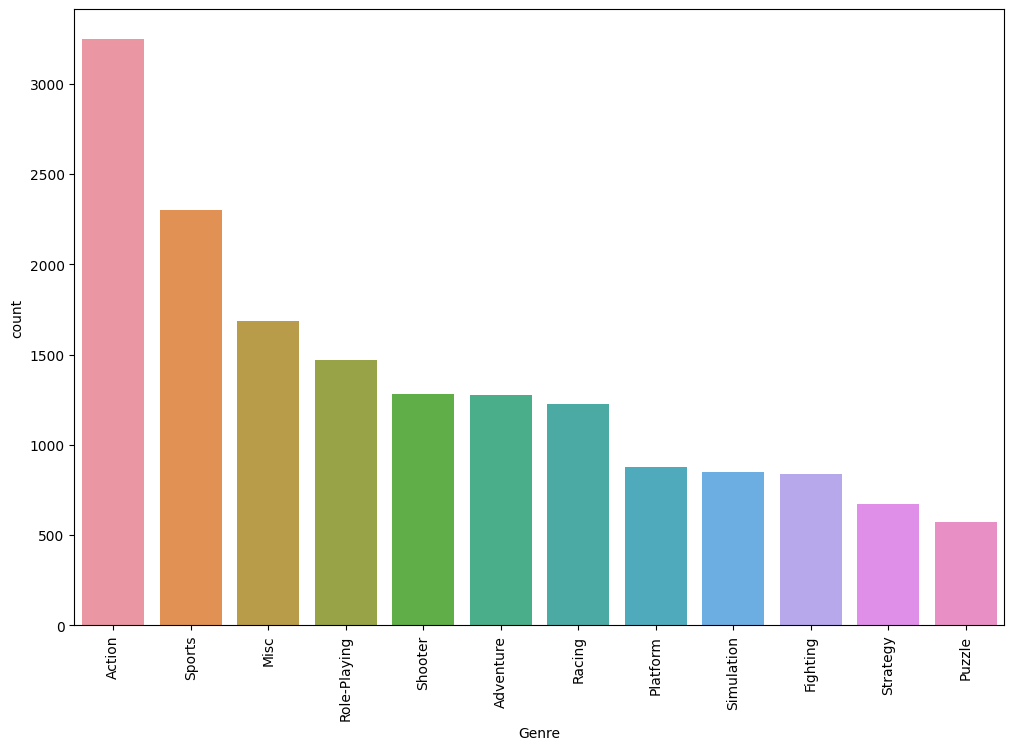

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="Genre", data=vg, order = vg['Genre'].value_counts().index)
plt.xticks(rotation=90)

In [17]:
vgsales=vg.head(100)

In [14]:
comp_genre = vg[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,69.25
1,Adventure,NA_Sales,6.16
2,Fighting,NA_Sales,9.99
3,Misc,NA_Sales,61.28
4,Platform,NA_Sales,138.08


<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

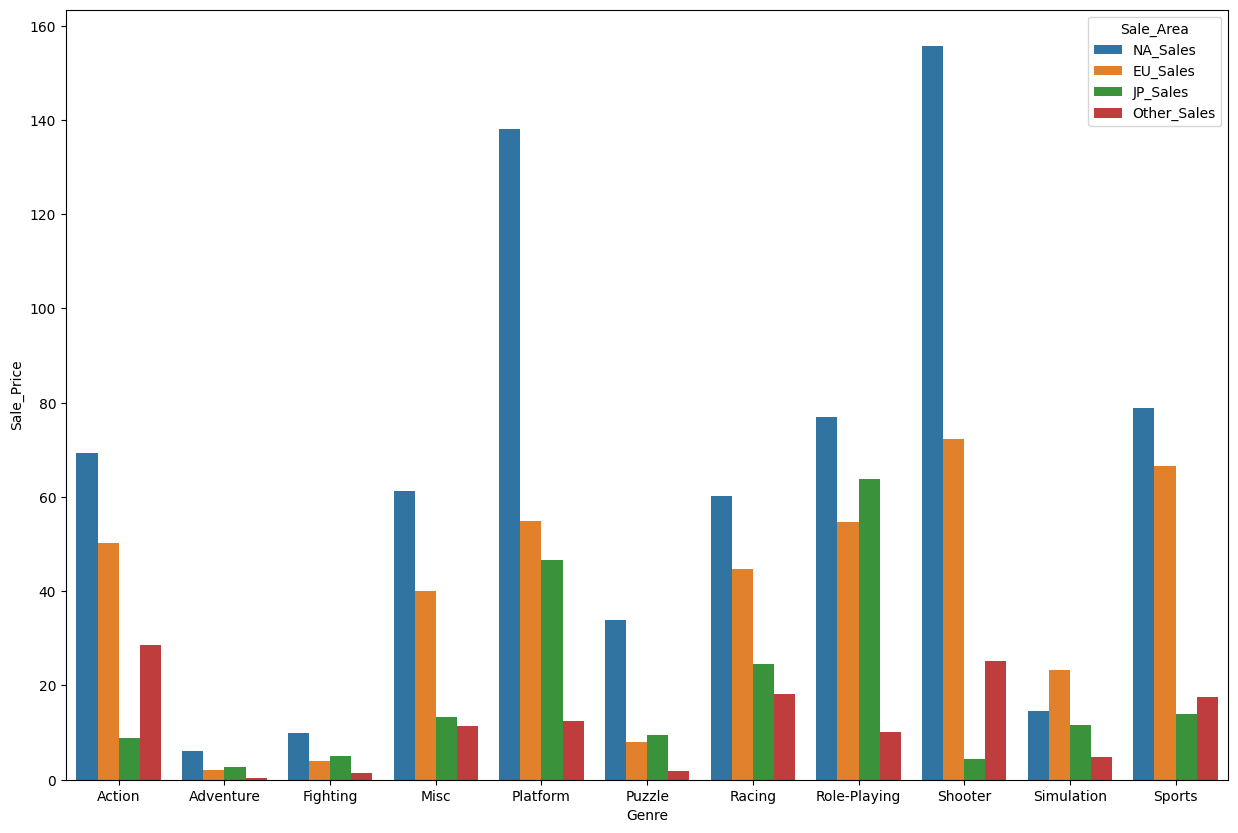

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

In [18]:
xaction=vgsales[vgsales.Genre=="Action"]
xsports=vgsales[vgsales.Genre=="Sports"]
xmisc=vgsales[vgsales.Genre=="Misc"]
xrole=vgsales[vgsales.Genre=="Role-Playing"]
xshooter=vgsales[vgsales.Genre=="Shooter"]
xadventure=vgsales[vgsales.Genre=="Adventure"]
xrace=vgsales[vgsales.Genre=="Racing"]
xplatform=vgsales[vgsales.Genre=="Platform"]
xsimulation=vgsales[vgsales.Genre=="Simulation"]
xfight=vgsales[vgsales.Genre=="Fighting"]
xstrategy=vgsales[vgsales.Genre=="Strategy"]
xpuzzle=vgsales[vgsales.Genre=="Puzzle"]

In [19]:
trace1 = go.Histogram(
    x=xaction.Platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,10,38)'))
trace2 = go.Histogram(
    x=xsports.Platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,44,39)'))
trace3 = go.Histogram(
    x=xmisc.Platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,103,67)'))
trace4 = go.Histogram(
    x=xrole.Platform,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,186,97)'))
trace5 = go.Histogram(
    x=xshooter.Platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,204,144)'))
trace6 = go.Histogram(
    x=xadventure.Platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,203,87)'))
trace7 = go.Histogram(
    x=xrace.Platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.Platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='white',
                   plot_bgcolor='white'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# CHAPTER 11

In [20]:
top_sales = vg.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

# CHAPTER 12

In [21]:
trace1 = go.Scatter(
                    x = vg.Rank,
                    y = vg.NA_Sales,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= vg.Name)

trace2 = go.Scatter(
                    x = vg.Rank,
                    y = vg.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= vg.Name)
trace3 = go.Scatter(
                    x = vg.Rank,
                    y = vg.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= vg.Name)
trace4 = go.Scatter(
                    x = vg.Rank,
                    y = vg.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'lime',size=8),
                    text= vg.Name)
                    

data = [trace1, trace2,trace3,trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

In [22]:
fig={
    "data" : [
    {
        'x': vg.Rank,
        'y': vg.Year,
        'mode': 'markers',
        'marker': {
            "color":vg.Global_Sales,
            'size': vg.Global_Sales,
            'showscale': True,
            "colorscale":'jet'
        },
        "text" :  "Name:"+ vg.Name +","+" Publisher:" + vg.Publisher
        
    },
],
"layout":
    {
    "title":"Release Years of Top 100 Video Games According to Global Sales",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(205, 205, 205)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(205, 205, 205)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(240, 240, 240)',
    "plot_bgcolor":'rgb(240, 240, 240)'
    }}

iplot(fig)

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(vg.corr(), cmap = "Blues", annot=True, linewidth=3)

In [ ]:
vg2 = vg.loc[:,["Year","Platform","NA_Sales","EU_Sales" ]]

vg2["index"] = np.arange(1,len(vg)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(vg2, diag='histogram', index='index',colormap='Picnic',
                                  colormap_type='seq',
                                  height=1000, width=1200)
iplot(fig)

# CHAPTER 13

In [ ]:
data_year = vg.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Year", y="Global_Sales",markers=True, data=data_year)
plt.xticks(rotation=90)